In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from scipy.stats import zscore
from sklearn import metrics

In [2]:
df=pd.read_csv('Unsupervised Learning.csv')

In [3]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
df['Private'].unique()

array(['Yes', 'No'], dtype=object)

In [5]:
df['Private']=df['Private'].replace(['Yes','No'],[1,0])

In [6]:
df1=df.drop('Unnamed: 0',axis=1)

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [8]:
Data1=pd.DataFrame(sc.fit_transform(df1),columns=df1.columns)

C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [9]:
Data1.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.612553,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,0.612553,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,0.612553,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,0.612553,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,0.612553,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


In [10]:
Data1.describe()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02
mean,-2.093849e-15,6.355797e-17,6.774575e-17,-5.249269e-17,-2.753232e-17,-1.546739e-16,-1.661405e-16,-3.029180e-17,6.515595e-17,3.570717e-16,-2.192583e-16,4.765243e-17,5.954768e-17,-4.481615e-16,-2.057556e-17,-6.022638e-17,1.213101e-16,3.886495e-16
std,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00,1.000644e+00
min,-1.632512e+00,-7.551337e-01,-7.947645e-01,-8.022728e-01,-1.506526e+00,-2.364419e+00,-7.346169e-01,-5.615022e-01,-2.014878e+00,-2.351778e+00,-2.747779e+00,-1.611860e+00,-3.962596e+00,-3.785982e+00,-2.929799e+00,-1.836580e+00,-1.240641e+00,-3.230876e+00
25%,-1.632512e+00,-5.754408e-01,-5.775805e-01,-5.793514e-01,-7.123803e-01,-7.476067e-01,-5.586426e-01,-4.997191e-01,-7.762035e-01,-6.939170e-01,-4.810994e-01,-7.251203e-01,-6.532948e-01,-5.915023e-01,-6.546598e-01,-7.868237e-01,-5.574826e-01,-7.260193e-01
50%,6.125530e-01,-3.732540e-01,-3.710108e-01,-3.725836e-01,-2.585828e-01,-9.077663e-02,-4.111378e-01,-3.301442e-01,-1.120949e-01,-1.437297e-01,-2.992802e-01,-2.078552e-01,1.433889e-01,1.561419e-01,-1.237939e-01,-1.408197e-01,-2.458933e-01,-2.698956e-02
75%,6.125530e-01,1.609122e-01,1.654173e-01,1.314128e-01,4.221134e-01,6.671042e-01,6.294077e-02,7.341765e-02,6.179271e-01,6.318245e-01,3.067838e-01,5.310950e-01,7.562224e-01,8.358184e-01,6.093067e-01,6.666852e-01,2.241735e-01,7.302926e-01
max,6.125530e-01,1.165867e+01,9.924816e+00,6.043678e+00,3.882319e+00,2.233391e+00,5.764674e+00,1.378992e+01,2.800531e+00,3.436593e+00,1.085230e+01,8.068387e+00,1.859323e+00,1.379560e+00,6.499390e+00,3.331452e+00,8.924721e+00,3.060392e+00


In [11]:
from sklearn.cluster import KMeans

In [12]:
k=KMeans() 
k.fit(Data1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
k.predict(Data1)

array([0, 0, 0, 3, 0, 6, 6, 3, 3, 0, 3, 3, 6, 3, 0, 6, 7, 0, 0, 5, 3, 4,
       0, 1, 6, 5, 3, 4, 0, 3, 6, 3, 0, 0, 6, 6, 3, 3, 6, 4, 6, 6, 6, 0,
       3, 5, 6, 0, 6, 6, 0, 6, 0, 0, 3, 6, 5, 0, 6, 1, 2, 4, 6, 2, 3, 6,
       0, 0, 6, 1, 7, 7, 3, 6, 3, 6, 6, 6, 4, 4, 6, 6, 0, 6, 6, 0, 3, 7,
       6, 0, 6, 7, 5, 6, 3, 0, 6, 0, 0, 6, 2, 6, 5, 5, 5, 0, 3, 6, 3, 6,
       6, 6, 5, 0, 7, 3, 6, 3, 4, 5, 6, 6, 3, 3, 6, 5, 0, 6, 6, 6, 6, 6,
       6, 6, 0, 0, 6, 3, 3, 3, 3, 4, 5, 6, 7, 0, 0, 0, 0, 3, 6, 6, 3, 0,
       0, 6, 0, 0, 7, 7, 0, 5, 3, 3, 3, 5, 0, 6, 0, 0, 0, 3, 3, 6, 7, 3,
       4, 5, 0, 0, 5, 5, 0, 0, 3, 6, 6, 6, 6, 0, 6, 7, 5, 6, 6, 5, 3, 5,
       0, 0, 6, 4, 6, 1, 0, 3, 5, 5, 0, 6, 0, 0, 0, 3, 0, 0, 6, 0, 4, 3,
       6, 7, 4, 4, 0, 3, 0, 6, 6, 0, 3, 0, 0, 5, 6, 0, 0, 3, 6, 6, 3, 0,
       3, 3, 3, 0, 6, 0, 6, 3, 7, 7, 0, 3, 3, 3, 3, 2, 3, 3, 6, 6, 0, 6,
       0, 0, 6, 6, 3, 4, 3, 6, 6, 4, 1, 5, 6, 4, 6, 4, 0, 5, 0, 3, 7, 5,
       0, 3, 4, 0, 5, 0, 3, 6, 6, 0, 3, 0, 6, 3, 6,

In [14]:
clusters=range(1,10) 
sse=[]

In [15]:
for i in clusters:
    k=KMeans(n_clusters=i)
    model=k.fit(Data1)
    sse.append(k.inertia_)

In [16]:
sse

[13986.0,
 11114.277674353794,
 8739.359359503298,
 7788.402904466629,
 7038.443536667011,
 6693.536087770393,
 6412.431082666124,
 6165.286067441044,
 5920.1993293486885]

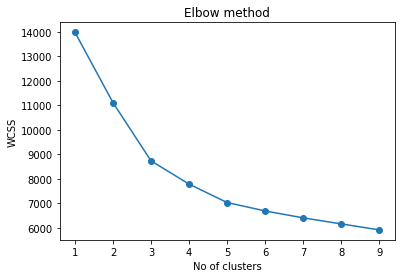

In [17]:
plt.plot(clusters,sse,"-o")
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.title("Elbow method")
plt.show() #here k =3, since after 3 ther is no significant change after 3

In [18]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

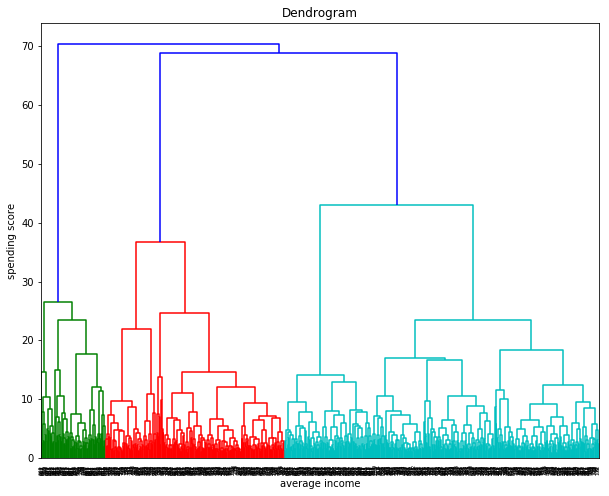

In [19]:
plt.figure(figsize=[10,8])
dendrogram=sch.dendrogram(sch.linkage(Data1, method="ward")) 
plt.xlabel("average income")
plt.ylabel("spending score")
plt.title("Dendrogram")
plt.show()

In [20]:
kmeans = KMeans(n_clusters=3)

In [21]:
kmeans.fit(Data1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
pred=kmeans.predict(Data1)

In [23]:
clusters = kmeans.labels_
clusters

array([1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 0, 1, 2, 2, 1,
       1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 0, 1, 2, 1, 2, 2, 1, 0, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       0, 0, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 2, 0, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2,
       1, 2, 0, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 2, 2, 1,
       1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1,

In [24]:
centroid=kmeans.cluster_centers_

In [25]:
c1=centroid[:,0] 
c2=centroid[:,1]

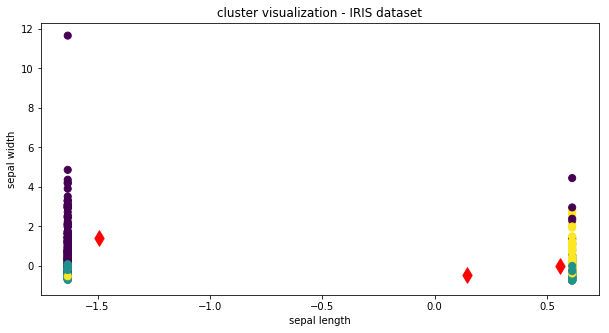

In [26]:
plt.figure(figsize=[10,5])
plt.scatter(Data1.iloc[:,0],Data1.iloc[:,1],c=pred,s=50) #plotting the whole data of sepal length and sepal width
#s=size
# i want to see the cluster centroid
plt.scatter(c1,c2,marker="d",c="r",s=120) #d=diamond
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("cluster visualization - IRIS dataset")
plt.show()

In [27]:
Data1.corr()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Private,1.000000,-0.432095,-0.475252,-0.567908,0.164132,0.095752,-0.615561,-0.452088,0.552650,0.340532,-0.018549,-0.304485,-0.156714,-0.129620,-0.472205,0.414775,0.258461,0.336162
Apps,-0.432095,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,-0.475252,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,-0.567908,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.164132,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.095752,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,-0.615561,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,-0.452088,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.552650,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.340532,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942


In [28]:
Data1.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [29]:
Data1['Outcome']=clusters

In [30]:
Data1.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Outcome
0,0.612553,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252,1
1,0.612553,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262,1
2,0.612553,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767,1
3,0.612553,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504,2
4,0.612553,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613,1


In [31]:
Data1['Outcome'].value_counts()

1    398
2    248
0    131
Name: Outcome, dtype: int64

In [32]:
Data1.to_csv('Data_final_output.csv')

In [33]:
Data1.shape

(777, 19)

In [34]:
X=Data1.drop('Outcome',axis=1)
Y=Data1['Outcome']

In [35]:
X.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.612553,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,0.612553,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,0.612553,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,0.612553,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,0.612553,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


In [36]:
Y.head()

0    1
1    1
2    1
3    2
4    1
Name: Outcome, dtype: int32

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test =train_test_split(X, Y, test_size=0.3, random_state=5)

In [39]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [40]:
expected = y_test
predicted = model.predict(X_test)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        41
           1       0.98      0.96      0.97       120
           2       0.99      0.93      0.96        73

   micro avg       0.96      0.96      0.96       234
   macro avg       0.94      0.96      0.95       234
weighted avg       0.96      0.96      0.96       234

[[ 41   0   0]
 [  4 115   1]
 [  3   2  68]]


In [41]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [42]:
lr=LogisticRegression()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
nb=GaussianNB()
models = [lr, nb, knn, dt, rf]
for mod in models : 
    print(mod)
    print("\n")
    mod.fit(X_train,y_train)
    print(mod.score(X_test,y_test))
    ypred = mod.predict(X_test)
    mod.score(X_test,y_test) 
    conf_matrix = metrics.confusion_matrix(y_test, ypred)
    print(conf_matrix)
    print(metrics.classification_report(y_test, ypred))
    print("\n \n")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


0.9658119658119658
[[ 40   1   0]
 [  0 115   5]
 [  2   0  71]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        41
           1       0.99      0.96      0.97       120
           2       0.93      0.97      0.95        73

   micro avg       0.97      0.97      0.97       234
   macro avg       0.96      0.97      0.96       234
weighted avg       0.97      0.97      0.97       234


 

GaussianNB(priors=None, var_smoothing=1e-09)


0.9572649572649573
[[ 41   0   0]
 [  4 115   1]
 [  3   2  68]]


C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.85      1.00      0.92        41
           1       0.98      0.96      0.97       120
           2       0.99      0.93      0.96        73

   micro avg       0.96      0.96      0.96       234
   macro avg       0.94      0.96      0.95       234
weighted avg       0.96      0.96      0.96       234


 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


0.9230769230769231
[[ 38   2   1]
 [  0 108  12]
 [  0   3  70]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        41
           1       0.96      0.90      0.93       120
           2       0.84      0.96      0.90        73

   micro avg       0.92      0.92      0.92       234
   macro avg       0.93      0.93      0.93       234
weighted avg       0.93      0.92      0.92       234



C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
